<a href="https://colab.research.google.com/github/bruzwyn/bruzwyn/blob/main/data_science_twitter_bruce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
search_term = 'audiomark'
max_tweets = 200
tweets = []
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(search_term).get_items()):
    if i >= max_tweets:
        break
    print(tweet.content)
    tweets.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

<ipython-input-6-2ed018c56bad>:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  print(tweet.content)
<ipython-input-6-2ed018c56bad>:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.id, tweet.content, tweet.user.username])


@davido @AppleMusic @SpotifyUSA @amazonmusic @youtubemusic Ha! Them don loose guard audiomark
@Seun_Agba @the_Lawrenz Ashley ju ni Spotify, Audiomark ati Boomplay ti wa okay!!!!
Hope you have download yours ...??! If no this link guys. audiomark https://t.co/p1jmxsEcpJ let make it puta ..💖🌹🎙 https://t.co/CkLQFlUobB
Another Bayelsa boy don drop banger o. @Tysonperfect001 has dropped his first EPP titled #EmotionsTheEP today. It's on audiomark for streaming.

Kindly show some love and anticipate.
https://t.co/UTyUcLXds4
Vibes by sola surliz is out now on audiomark stream the song and support 🙏🙏🙏🙏 #viralvideo #songwriting #Songkran #music #bettervibes @davido @davido_global @DavidDobrik @Richard_Tundee @Olamide @MAVINRECORDS @DONJAZZY @itelNigeria https://t.co/eC6xPj1TGa
Get the vibe on audiomark. but still uploading in all the social media platforms. 👉https://t.co/5xmynpv6FQ @davido @burnaboy @wizkidayo @Powerfm987 @PopcaanMusic @PulseNigeria247 @DaBabyDaBaby @asakemusik @Olamide @Spotif

In [7]:
tweet_data = pd.DataFrame(tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweet_data.to_csv('tweets.csv', encoding='utf-8')

In [8]:
import os
path=os.path.join(os.curdir, 'tweets.csv')
df=pd.read_csv(path, index_col=0)
df.head(5)

,Datetime,Tweet Id,Text,Username
0,2023-04-14 14:33:28+00:00,1646884378100789250,@davido @AppleMusic @SpotifyUSA @amazonmusic @...,chrizyawe
1,2023-04-14 04:11:34+00:00,1646727873070346246,"@Seun_Agba @the_Lawrenz Ashley ju ni Spotify, ...",Popsicle2050
2,2023-04-13 20:14:28+00:00,1646607805619552263,Hope you have download yours ...??! If no this...,flowerboi0999
3,2023-04-13 06:47:27+00:00,1646404715427528704,Another Bayelsa boy don drop banger o. @Tysonp...,KingErefitei
4,2023-04-13 03:09:17+00:00,1646349813393358849,Vibes by sola surliz is out now on audiomark s...,SolaSurliz


In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  200 non-null    object
 1   Tweet Id  200 non-null    int64 
 2   Text      200 non-null    object
 3   Username  200 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.8+ KB


In [11]:
df.isnull().sum()

Datetime    0
Tweet Id    0
Text        0
Username    0
dtype: int64

In [12]:
### Determine the most frequent hashtags, links, and mentions:
hashtags = Counter([tag.strip("#") for text in df['Text'] for tag in text.split() if tag.startswith("#")])
links = Counter([link for text in df['Text'] for link in text.split() if link.startswith("http")])
mentions = Counter([mention.strip("@") for text in df['Text'] for mention in text.split() if mention.startswith("@")])
print("Most frequent hashtags:", hashtags.most_common(10))
print("Most frequent links:", links.most_common(10))
print("Most frequent mentions:", mentions.most_common(10))

Most frequent hashtags: [('TimelessAlbum', 3), ('viralvideo', 2), ('TimeleesAlbum', 2), ('1', 2), ('audiomark', 2), ('BBTitans', 2), ('Audiomark', 2), ('EmotionsTheEP', 1), ('songwriting', 1), ('Songkran', 1)]
Most frequent links: [('https://t.co/p1jmxsEcpJ', 1), ('https://t.co/CkLQFlUobB', 1), ('https://t.co/UTyUcLXds4', 1), ('https://t.co/eC6xPj1TGa', 1), ('https://t.co/hSOLLXCjx5', 1), ('https://t.co/bZdq6CP5Dl', 1), ('https://t.co/Kgty7XmP1j', 1), ('https://t.co/fq28WAcHgG', 1), ('https://t.co/wjkaCDTdnJ', 1), ('https://t.co/SbM7WU0pav', 1)]
Most frequent mentions: [('davido', 15), ('Deevybs', 9), ('deenayaah', 6), ('DONJAZZY', 5), ('shattawalegh', 3), ('AppleMusic', 2), ('davido_global', 2), ('Olamide', 2), ('MAVINRECORDS', 2), ('wizkidayo', 2)]


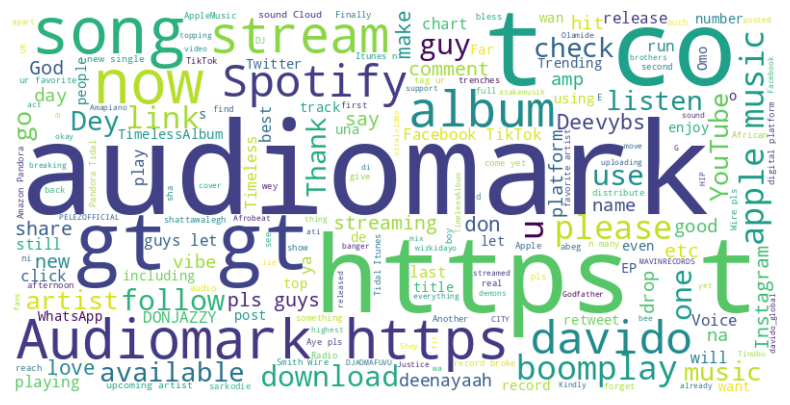

In [13]:
text = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


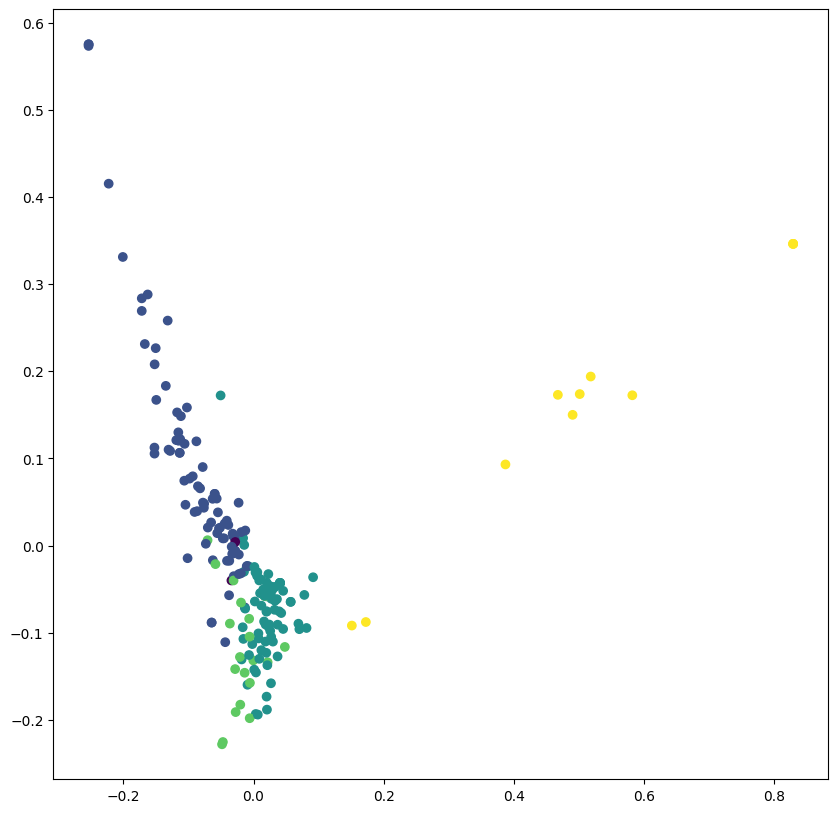

In [15]:
bloblist = [TextBlob(text) for text in df['Text']]
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
vectors = tfidf.fit_transform([str(blob) for blob in bloblist])
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(vectors)
labels = kmeans.labels_
pca = PCA(n_components=2).fit(vectors.toarray())
datapoint = pca.transform(vectors.toarray())
plt.figure(figsize=(10, 10))
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=labels)
plt.show()


In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
#Perform sentiment analysis using the TextBlob library and a predefined list of positive and negative words:

pos_words = ['good', 'great', 'excellent', 'happy', 'love', 'like', 'awesome', 'fantastic', 'amazing', 'fun']
neg_words = ['bad', 'terrible', 'awful', 'horrible', 'hate', 'dislike', 'worst', 'sad', 'angry', 'disappoint']
polarity_scores = []
for text in df['Text']:
    blob = TextBlob(text)
    pos_count = len([word for word in blob.words if word.lower() in pos_words])
    neg_count = len([word for word in blob.words if word.lower() in neg_words])
    polarity_score = (pos_count - neg_count) / (pos_count + neg_count + 1e-8)
    polarity_scores.append(polarity_score)
df['Polarity Score'] = polarity_scores
print("Mean Polarity Score:", df['Polarity Score'].mean())

Mean Polarity Score: 0.12499999887500002


In [18]:
df.head()

,Datetime,Tweet Id,Text,Username,Polarity Score
0,2023-04-14 14:33:28+00:00,1646884378100789250,@davido @AppleMusic @SpotifyUSA @amazonmusic @...,chrizyawe,0.0
1,2023-04-14 04:11:34+00:00,1646727873070346246,"@Seun_Agba @the_Lawrenz Ashley ju ni Spotify, ...",Popsicle2050,0.0
2,2023-04-13 20:14:28+00:00,1646607805619552263,Hope you have download yours ...??! If no this...,flowerboi0999,0.0
3,2023-04-13 06:47:27+00:00,1646404715427528704,Another Bayelsa boy don drop banger o. @Tysonp...,KingErefitei,1.0
4,2023-04-13 03:09:17+00:00,1646349813393358849,Vibes by sola surliz is out now on audiomark s...,SolaSurliz,0.0


In [19]:
#Install these requirements to be used in detection of named entities such as place names, person names, and organization names
!pip install -U spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.1
    Uninstalling spacy-3.5.1:
      Successfully uninstalled spacy-3.5.1
2023-04-14 16:17:40.463604: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 16:17:41.300143: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 68.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load th

In [20]:
#detection of named entities such as place names, person names, and organization names,
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_named_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]

named_entities = []
for text in df['Text']:
    named_entities += extract_named_entities(text)
named_entities_df = pd.DataFrame(named_entities, columns=['Entity', 'Label'])
print("Named Entities:", named_entities_df['Entity'].unique())

Named Entities: ['@AppleMusic' 'Spotify' 'Audiomark' 'Boomplay' '💖🌹'
 'https://t.co/CkLQFlUobB' 'Bayelsa' 'banger o. @Tysonperfect001' 'first'
 'EPP' 'EmotionsTheEP' 'today' 'https://t.co/UTyUcLXds4' '🙏🙏🙏🙏' '#'
 'Songkran' '@DavidDobrik' '@itelNigeria https://t.co/eC6xPj1TGa'
 '@DaBabyDaBaby @asakemusik'
 '@Olamide @SpotifyNews @SOUNDCITYtv @rexxiepondabeat'
 '@DONJAZZY https://t.co/hSOLLXCjx5' 'https://t.co/bZdq6CP5Dl\nPlease'
 'Big Vince' '@DJADMAFUVU' 'Lmao Apple Music' 'the 2nd' 'Nigeria'
 'Turntables' 'Radio' 'Leo' 'nafasi' 'kutafuta' 'Album' 'HIP'
 'mazingira ya AudioMark' 'hii Album' 'ya kijana' 'Tanzania' 'EDDY'
 'Mikwaju' 'Drop' '@wewacha Audiomark' '@glesomu @akramakbanks256 Shana'
 '🙏' 'Mensa' 'yesterday' 'Amapiano' 'Instagram Spotify Facebook'
 'Cloud Audiomark' 'Pandora Tidal Itunes' 'Davido' 'African' '1' 'US'
 'iTunes' 'chart\n🥇' 'UK' 'Apple' '50' 'only 6 days'
 'https://t.co/nKCQA29OAT' 'TimeleesAlbum' 'TimelessAlbum' 'OBO'
 '@Shattawalenews' 'Ghana' 'Kojo Sheldon de33'

In [21]:
named_entities_df

,Entity,Label
0,@AppleMusic,CARDINAL
1,Spotify,GPE
2,Audiomark,GPE
3,Boomplay,FAC
4,💖🌹,PERSON
...,...,...
432,thePidgin Rap Mansa,PERSON
433,https://t.co/Kc2sq5vtND,GPE
434,Enjoy,PERSON
435,zillion dollar,MONEY


In [22]:
# Load the collected Twitter data into a Pandas dataframe

# Define a function to perform sentiment analysis on a text using TextBlob
def get_sentiment(polarity_score):
    if polarity_score > 0:
        return 'positive'
    elif polarity_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis function to the 'Text' column of the dataframe
df['Sentiment'] = df['Polarity Score'].apply(get_sentiment)

# Print the number of positive, negative, and neutral tweets
print('Positive:', len(df[df['Sentiment'] == 'positive']))
print('Negative:', len(df[df['Sentiment'] == 'negative']))
print('Neutral:', len(df[df['Sentiment'] == 'neutral']))

Positive: 27
Negative: 2
Neutral: 171


In [23]:
df.head(5)

,Datetime,Tweet Id,Text,Username,Polarity Score,Sentiment
0,2023-04-14 14:33:28+00:00,1646884378100789250,@davido @AppleMusic @SpotifyUSA @amazonmusic @...,chrizyawe,0.0,neutral
1,2023-04-14 04:11:34+00:00,1646727873070346246,"@Seun_Agba @the_Lawrenz Ashley ju ni Spotify, ...",Popsicle2050,0.0,neutral
2,2023-04-13 20:14:28+00:00,1646607805619552263,Hope you have download yours ...??! If no this...,flowerboi0999,0.0,neutral
3,2023-04-13 06:47:27+00:00,1646404715427528704,Another Bayelsa boy don drop banger o. @Tysonp...,KingErefitei,1.0,positive
4,2023-04-13 03:09:17+00:00,1646349813393358849,Vibes by sola surliz is out now on audiomark s...,SolaSurliz,0.0,neutral


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer to convert the text data to numerical features
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a LogisticRegression model to predict the sentiment of the tweets
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Use the model to predict the sentiment of the test data
y_pred = model.predict(X_test)

# Print the accuracy, precision, recall, and F1 score of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.85
Precision: 0.7224999999999999
Recall: 0.85
F1 Score: 0.7810810810810811


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#the predictions are:
y_pred

array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral'], dtype=object)